## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

### Loading Dataset

In [ ]:
data = pd.read_csv("../data/processed/upi_fraud_dataset_clean.csv")
X = data.drop(columns=['FraudFlag'])
y = data['FraudFlag']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Loading Pickled Models

In [3]:
model_names = [
    "logistic_regression",
    "decision_tree",
    "random_forest",
    "gradient_boosting",
    "support_vector_machine",
    "k-nearest_neighbors",
    "xgboost",
    "lightgbm",
    "catboost"
]

results = []

for model_name in model_names:
    model_path = f"../models/{model_name}.pkl"
    model = joblib.load(model_path)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append([model_name, accuracy, precision, recall, f1, roc_auc])

    # Print Model Performance
    print(f"\n🔹 {model_name.replace('_', ' ').title()} Evaluation")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


🔹 Logistic Regression Evaluation
Accuracy: 0.7774, Precision: 0.6234, Recall: 0.0886, F1-score: 0.1551, ROC-AUC: 0.6986

Confusion Matrix:
[[1778   29]
 [ 494   48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1807
           1       0.62      0.09      0.16       542

    accuracy                           0.78      2349
   macro avg       0.70      0.54      0.51      2349
weighted avg       0.75      0.78      0.71      2349


🔹 Decision Tree Evaluation
Accuracy: 0.7935, Precision: 0.5476, Recall: 0.6052, F1-score: 0.5749, ROC-AUC: 0.7276

Confusion Matrix:
[[1536  271]
 [ 214  328]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1807
           1       0.55      0.61      0.57       542

    accuracy                           0.79      2349
   macro avg       0.71      0.73      0.72      2349
weighted avg       0.80  

## Comparison


Model Performance Summary:
                     Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
8                catboost  0.915283   1.000000  0.632841  0.775141  0.833445
7                lightgbm  0.911877   0.997033  0.619926  0.764505  0.827659
6                 xgboost  0.911452   0.977143  0.630996  0.766816  0.848882
3       gradient_boosting  0.901660   1.000000  0.573801  0.729191  0.824563
2           random_forest  0.873563   0.984190  0.459410  0.626415  0.882608
4  support_vector_machine  0.841635   0.832031  0.392989  0.533835  0.818582
1           decision_tree  0.793529   0.547579  0.605166  0.574934  0.727597
5     k-nearest_neighbors  0.782035   0.520161  0.714022  0.601866  0.829211
0     logistic_regression  0.777352   0.623377  0.088561  0.155089  0.698613


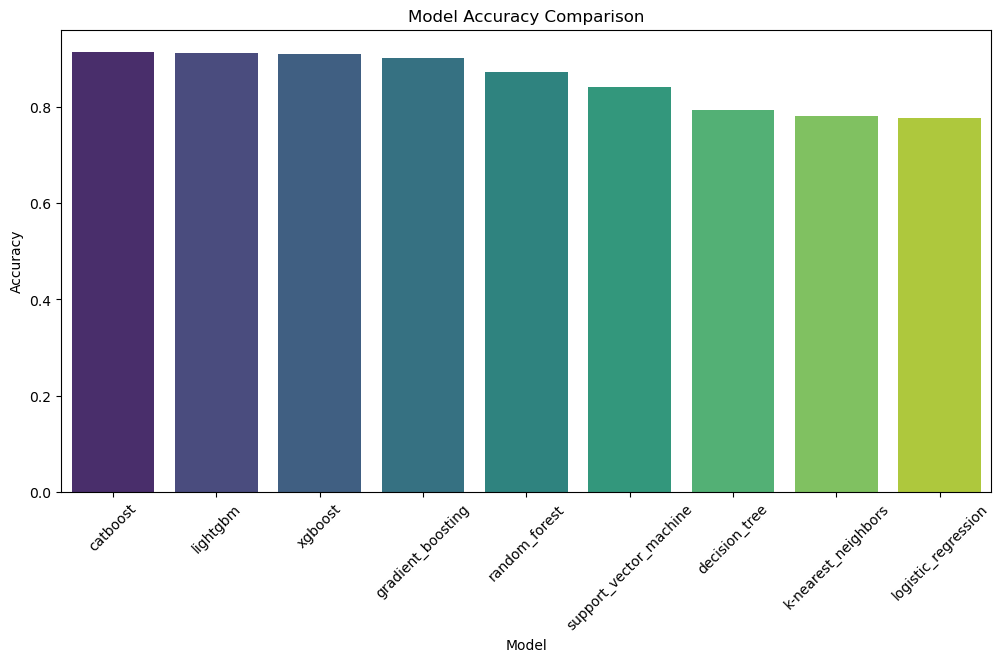

In [7]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"])

results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

print("\nModel Performance Summary:\n", results_df)

results_df.to_csv("../reports/model_evaluation.csv", index=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.show()

## Loading Best Model

In [8]:
best_model_name = results_df.iloc[0]["Model"]
best_model = joblib.load(f"../models/{best_model_name}.pkl")

print(f"Best Model Selected: {best_model_name.replace('_', ' ').title()}")

joblib.dump(best_model, "../models/best_model.pkl")

Best Model Selected: Catboost


['../models/best_model.pkl']